In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

## Data Import and Exploration

In [ ]:
loc0 = (r'Data_Train.xlsx')
loc1 = (r'Data_Test.xlsx')
train = pd.read_excel(loc0, error_bad_lines=False)
test = pd.read_excel(loc1, error_bad_lines=False)
loc3 = (r'Sample_Submission.xlsx')
sample = pd.read_excel(loc3, error_bad_lines=False)

In [ ]:
test2 = pd.read_excel(loc1, error_bad_lines=False)
train2 = pd.read_excel(loc0, error_bad_lines=False)

In [ ]:
train

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",₹150,₹50,3.8,46,18,30 minutes
6,ID_3777,Mumbai Central,"Beverages, Fast Food",₹150,₹50,3.7,108,31,30 minutes
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",₹650,₹50,4.0,1731,1235,45 minutes
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",₹100,₹50,3.9,110,26,30 minutes
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",₹200,₹50,3.9,562,294,65 minutes


In [ ]:
kk = train 
kk.loc[:]['Rating'] = kk['Rating'].replace('Temporarily Closed','')
kk.loc[:]['Rating'] = kk['Rating'].replace('NEW','')
kk.loc[:]['Rating'] = kk['Rating'].replace('-','')
kk.loc[:]['Rating'] = kk['Rating'].replace('Opening Soon','')
m=0
ff=0
for i in range(0,len(kk)):
    if(kk['Rating'][i] != ''):
        f= float(kk['Rating'][i])
        m = m + f
        ff=ff+1
m = m/ff
print(m)
m = 3.6
kk.loc[:]['Rating'] = kk['Rating'].replace('',3.6)
kk['Rating'] = kk['Rating'].astype(float)
kk.head()

3.6110780602126007


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,₹99,3.2,521,235,65 minutes


In [ ]:
m=0
ff=0
for i in range(0,len(kk)):
    if(kk['Votes'][i] != '-'):
        f= float(kk['Votes'][i])
        m = m + f
        ff=ff+1
m = m/ff
print(m)
m=200
kk.loc[:]['Votes'] = kk['Votes'].replace('-',m)
kk['Votes'] = kk['Votes'].astype(int)
kk.head()

199.3882278709212


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,₹99,3.2,521,235,65 minutes


In [ ]:
m=0
ff=0
for i in range(0,len(kk)):
    if(kk['Reviews'][i] != '-'):
        f= float(kk['Reviews'][i])
        m = m + f
        ff=ff+1
m = m/ff
print(m)
m=139
kk.loc[:]['Reviews'] = kk['Reviews'].replace('-',m)
kk['Reviews'] = kk['Reviews'].astype(int)
kk.head()

139.24310438074636


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,loc
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",00,₹50,3.5,12,4,30,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",00,₹50,3.5,11,4,30,1
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",50,₹50,3.6,99,30,65,2
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",50,₹99,3.7,176,95,30,3
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",00,₹99,3.2,521,235,65,4


In [ ]:
for i in range(0,len(kk)):
    t = kk['Average_Cost'][i]
    t = t[1:]
    kk['Average_Cost'][i] = t

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
for i in range(0,len(kk)):
    t = kk['Average_Cost'][i]
    if(t == 'or'):
        kk['Average_Cost'][i]=200
    t = str(t)
    if(len(t)<2):
        continue
    for ii in range(0,len(t)):
        if(t[ii]==','):
            t = t[0:ii]+t[ii+1:]
        kk['Average_Cost'][i] = t
    if(i%100 ==0):
        print(i)
kk['Average_Cost'] = kk['Average_Cost'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000


In [ ]:
t

In [ ]:
for i in range(0,len(kk)):
  #  t = kk['Delivery_Time'][i]
  #  t = t[:3]
    kk['Delivery_Time'][i] = kk['Delivery_Time'][i][:3]
    if(i%100 ==0):
        print(i)
kk['Delivery_Time'] = kk['Delivery_Time'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000


In [ ]:
for i in range(0,len(kk)):
    t = kk['Minimum_Order'][i]
    t = t[1:]
    kk['Minimum_Order'][i] = t

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
uu = train
uu = uu.append(test)
yy5 = pd.factorize(uu['Location'])

In [ ]:
u1 = kk['Location'].unique()
len(u1)

35

In [ ]:
test.head()

In [ ]:
yy5[0][:2]

array([0, 1], dtype=int64)

In [ ]:
kk['loc'] = yy5[0][:len(kk)]

In [ ]:
kk

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,loc
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",00,₹50,3.5,12,4,30 minutes,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",00,₹50,3.5,11,4,30 minutes,1
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",50,₹50,3.6,99,30,65 minutes,2
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",50,₹99,3.7,176,95,30 minutes,3
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",00,₹99,3.2,521,235,65 minutes,4
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",50,₹50,3.8,46,18,30 minutes,4
6,ID_3777,Mumbai Central,"Beverages, Fast Food",50,₹50,3.7,108,31,30 minutes,2
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",50,₹50,4.0,1731,1235,45 minutes,5
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",00,₹50,3.9,110,26,30 minutes,5
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",00,₹50,3.9,562,294,65 minutes,3


In [ ]:
for i in range(0,len(kk)):
    

In [ ]:
kkk=kk
lll = kk['Cuisines']
kkk.drop('Restaurant', axis = 1, inplace = True)
kkk.drop('Cuisines', axis = 1, inplace = True)
kkk.drop('Location', axis = 1, inplace = True)
#kkk.drop('Minimum_Order', axis = 1, inplace = True)

In [ ]:
train_Y = kk['Delivery_Time']
kkk = kk
kkk.drop('Delivery_Time', axis = 1, inplace = True)
#test.drop('Date', axis = 1, inplace = True)

Text(0.5, 1.0, 'Correlation between different fearures')

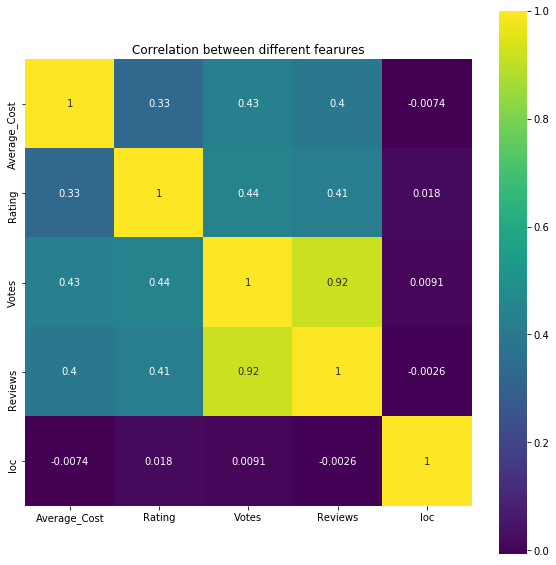

In [ ]:
correlation = kk.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

## Model Training and Prediction

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(kkk, train_Y, test_size = 0.2, 
                                                           random_state = 42)

In [ ]:
def evaluate_models(number_of_est, maximum_depth, models, train_X, test_X):    
    '''Function to evaluate the performance of a tree based model (based on R2 score), over a grid of
        number of estimators and maximum depth. Function takes in choice of model, array of n_estimators, 
        array of max_depth and training and testing sets'''
    for model_choice in models:
        for n_est in number_of_est:
            for max_d in maximum_depth:
                model = model_choice(n_estimators=n_est, max_depth=max_d, random_state = 2)
                model.fit(X_train, y_train)
                CVpred = model.predict(X_test)
                mae = mean_absolute_error(y_test, CVpred)
    
                r2 = r2_score(y_test, CVpred)
                print(model_choice,',Estimators:',n_est,',Max_Depth:',max_d,',R2:', r2,',MAE:',mae)

In [ ]:
#models = [RandomForestRegressor, GradientBoostingRegressor]
models = [RandomForestRegressor]
#number_of_est = [20, 30, 40, 50, 60]
number_of_est = [250, 150, 80, 50, 60]
#maximum_depth = [8, 10, 15]
maximum_depth = [5, 10, 15, 20, 25, 30]
evaluate_models(number_of_est, maximum_depth, models, X_train, y_train)

<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 250 ,Max_Depth: 5 ,R2: 0.21717715848090013 ,MAE: 6.741663322122218
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 250 ,Max_Depth: 10 ,R2: 0.22847740404000083 ,MAE: 6.561597275052767
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 250 ,Max_Depth: 15 ,R2: 0.22496669047883344 ,MAE: 6.53601082313132
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 250 ,Max_Depth: 20 ,R2: 0.2241511935024455 ,MAE: 6.516225137336785
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 250 ,Max_Depth: 25 ,R2: 0.22505303551239464 ,MAE: 6.521879959493485
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 250 ,Max_Depth: 30 ,R2: 0.22436693294203325 ,MAE: 6.527363270568158
<class 'sklearn.ensemble.forest.RandomForestRegressor'> ,Estimators: 150 ,Max_Depth: 5 ,R2: 0.21839183723997335 ,MAE: 6.740397464296881
<class 'sklearn.ensemble.forest.RandomForestR

In [ ]:
kk

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,loc
0,0,50,3.5,12,4,30,0
1,0,50,3.5,11,4,30,1
2,50,50,3.6,99,30,65,2
3,50,99,3.7,176,95,30,3
4,0,99,3.2,521,235,65,4
5,50,50,3.8,46,18,30,4
6,50,50,3.7,108,31,30,2
7,50,50,4.0,1731,1235,45,5
8,0,50,3.9,110,26,30,5
9,0,50,3.9,562,294,65,3


In [ ]:
test.loc[:]['Rating'] = test['Rating'].replace('Temporarily Closed',3.6)
test.loc[:]['Rating'] = test['Rating'].replace('NEW',3.6)
test.loc[:]['Rating'] = test['Rating'].replace('-',3.6)
test.loc[:]['Rating'] = test['Rating'].replace('Opening Soon',3.6)
test['Rating'] = test['Rating'].astype(float)
test.loc[:]['Votes'] = test['Votes'].replace('-',200)
test['Votes'] = test['Votes'].astype(int)
test.loc[:]['Reviews'] = test['Reviews'].replace('-',139)
test['Reviews'] = test['Reviews'].astype(int)


In [ ]:
for i in range(0,len(test)):
    t = test['Average_Cost'][i]
    t = t[1:]
    test['Average_Cost'][i] = t
    

In [ ]:
for i in range(0,len(test)):
    t = test['Average_Cost'][i]
    if(t == 'or'):
        test['Average_Cost'][i]=200
        
    if(t[1]==','):
        t = t[0]+t[2:]
        test['Average_Cost'][i] = t
test['Average_Cost'] = test['Average_Cost'].astype(int)

In [ ]:
test['Minimum_Order'] = test2['Minimum_Order']
for i in range(len(test)):
    test['Minimum_Order'][i] = test['Minimum_Order'][i][1:]
    if(i%100==0):
        print (i)

In [ ]:
#test['Minimum_Order']

In [ ]:
test['Minimum_Order'] = test['Minimum_Order'].astype(int)

In [ ]:
test['loc']=yy5[0][len(kk):]

In [ ]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,loc
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",350,50,4.2,361,225,14
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",100,50,3.6,200,139,14
2,ID_4620,"Sector 1, Noida",Fast Food,100,50,3.6,36,16,3
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",200,50,3.6,66,33,27
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",150,50,2.9,38,14,3


In [ ]:
test.drop('Restaurant', axis = 1, inplace = True)
test.drop('Cuisines', axis = 1, inplace = True)
test.drop('Location', axis = 1, inplace = True)

In [ ]:
#kkk

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,loc
0,0,50,3.5,12,4,0
1,0,50,3.5,11,4,1
2,50,50,3.6,99,30,2
3,50,99,3.7,176,95,3
4,0,99,3.2,521,235,4
5,50,50,3.8,46,18,4
6,50,50,3.7,108,31,2
7,50,50,4.0,1731,1235,5
8,0,50,3.9,110,26,5
9,0,50,3.9,562,294,3


In [ ]:
regr = RandomForestRegressor(n_estimators=150, max_depth=10, random_state = 2)
regr.fit(kkk, train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [ ]:
#regr = RandomForestRegressor.fit(kkk,train_Y)
sub = RandomForestRegressor.predict(regr,test)

In [ ]:
for i in range(0,len(sub)):
    sub[i] = int(sub[i]) 
    pp = sub[i]
    if(pp%10 < 3):
        pp = pp+5-pp%10
    elif(pp%10 > 7):
        pp = pp+10-pp%10
    else:
        pp = pp+5-pp%10
    sub[i]=pp
    sub[i] = sub[i]+20
ll = []
for i in range(0,len(sub)):
    t = str(sub[i])
    t = t[:-2]
    t = t+' minutes'
    ll.append(t)

In [ ]:
sample['Delivery_Time'] = ll
sample.head()

,Delivery_Time
0,45 minutes
1,45 minutes
2,45 minutes
3,45 minutes
4,45 minutes


In [ ]:
sample.to_excel('submit11.xlsx',index=None)

In [ ]:
sample['Delivery_Time'].unique()

array(['45 minutes', '35 minutes', '40 minutes', '55 minutes',
       '50 minutes', '105 minutes', '60 minutes', '85 minutes',
       '65 minutes'], dtype=object)

In [ ]:
train2['Delivery_Time'].unique()

array(['30 minutes', '65 minutes', '45 minutes', '10 minutes',
       '20 minutes', '120 minutes', '80 minutes'], dtype=object)

In [ ]:
train_Y.mean()

37.056066342166936

In [ ]:
from sklearn.ensemble import RandomForestClassifier
regr2 = RandomForestClassifier(n_estimators=1000, max_depth=50, random_state = 2)
regr2.fit(train4, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [ ]:
sub2 = RandomForestClassifier.predict(regr2,test4)

In [ ]:
sub2[1222:2222]

array(['45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 minutes',
       '45 minutes', '45 minutes', '45 minutes', '45 mi

In [ ]:
train3 = train2
train3 = train3.append(test2)


In [ ]:
train3.reset_index(drop=True)

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,0,0,30 minutes,0,0,0,0,0,0
1,1,1,30 minutes,1,0,0,1,0,1
2,2,2,65 minutes,2,0,1,2,1,2
3,3,3,30 minutes,3,1,2,3,2,3
4,0,4,65 minutes,4,1,3,4,3,4
5,2,5,30 minutes,4,0,4,5,4,5
6,2,6,30 minutes,2,0,2,6,5,6
7,4,7,45 minutes,5,0,5,7,6,7
8,1,8,30 minutes,5,0,6,8,7,8
9,0,9,65 minutes,3,0,6,9,8,9


In [ ]:
train3['Location'] = pd.factorize(train3['Location'])[0]
train3['Restaurant'] = pd.factorize(train3['Restaurant'])[0]
train3['Cuisines'] = pd.factorize(train3['Cuisines'])[0]
train3['Average_Cost'] = pd.factorize(train3['Average_Cost'])[0]
train3['Minimum_Order'] = pd.factorize(train3['Minimum_Order'])[0]
train3['Rating'] = pd.factorize(train3['Rating'])[0]
train3['Votes'] = pd.factorize(train3['Votes'])[0]
train3['Reviews'] = pd.factorize(train3['Reviews'])[0]

In [ ]:
train3.head()

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,0,0,30 minutes,0,0,0,0,0,0
1,1,1,30 minutes,1,0,0,1,0,1
2,2,2,65 minutes,2,0,1,2,1,2
3,3,3,30 minutes,3,1,2,3,2,3
4,0,4,65 minutes,4,1,3,4,3,4


In [ ]:
train4 = train3[:len(train2)]
test4 = train3[len(train2):]

In [ ]:
test4.reset_index(drop=True)

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,26,2179,NaN,35,18,33,7480,761,1103
1,27,2180,NaN,35,18,34,7481,762,1104
2,27,2181,NaN,36,18,35,7482,763,1105
3,28,2182,NaN,37,18,35,7483,764,1106
4,29,2183,NaN,36,18,36,7484,765,1107
5,27,2184,NaN,38,18,37,7485,766,1108
6,28,2185,NaN,39,18,38,7486,767,1109
7,29,2186,NaN,40,18,39,7487,768,1110
8,28,2187,NaN,36,18,34,7488,762,1104
9,28,2188,NaN,41,18,40,7489,769,1111


In [ ]:
train_Y = train4['Delivery_Time']

In [ ]:
test4.drop('Delivery_Time', axis = 1, inplace = True)
train4.drop('Delivery_Time', axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
train4

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,0,1
2,2,2,2,0,1,2,1,2
3,3,3,3,1,2,3,2,3
4,0,4,4,1,3,4,3,4
5,2,5,4,0,4,5,4,5
6,2,6,2,0,2,6,5,6
7,4,7,5,0,5,7,6,7
8,1,8,5,0,6,8,7,8
9,0,9,3,0,6,9,8,9


In [ ]:
test4

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,26,2179,35,18,33,7480,761,1103
1,27,2180,35,18,34,7481,762,1104
2,27,2181,36,18,35,7482,763,1105
3,28,2182,37,18,35,7483,764,1106
4,29,2183,36,18,36,7484,765,1107
5,27,2184,38,18,37,7485,766,1108
6,28,2185,39,18,38,7486,767,1109
7,29,2186,40,18,39,7487,768,1110
8,28,2187,36,18,34,7488,762,1104
9,28,2188,41,18,40,7489,769,1111
